# Importing necessary Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data as pandas dataframe

In [3]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Find the numbers of missing values in each column

In [4]:
def find_missing_values(dataframe):
    """ Find the Number of missing values in each column
    Args:
        dataframe: dataframe of which we need to find no. of missing values in each column
    Return:
        Pandas Dataframe: dataframe with columns and it's respective no. of missing values
    """
    
    missing_values_dict={'Columns':[],'Number of Missing Values':[]}
    for i in dataframe:
        missing_values_dict['Columns'].append(i)
        missing_values_dict['Number of Missing Values'].append(dataframe[i].isnull().sum())

    return pd.DataFrame(missing_values_dict)

In [5]:
find_missing_values(train_df)

,Columns,Number of Missing Values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


# 3. Delete missing rows

In [55]:
null_deleted_df = train_df.dropna()
find_missing_values(null_deleted_df)

,Columns,Number of Missing Values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,0
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


# 4. Fill the missing values with mean

In [7]:
mean_filled_df  =  train_df.fillna({'Age': train_df.Age.mean()})
find_missing_values(mean_filled_df)

,Columns,Number of Missing Values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,0
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


# 5. Fill the missing values with median

In [8]:
median_filled_df  =  train_df.fillna({'Age': train_df.Age.mean()})
find_missing_values(median_filled_df)

,Columns,Number of Missing Values
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,0
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


# 6. Find outliers in the data

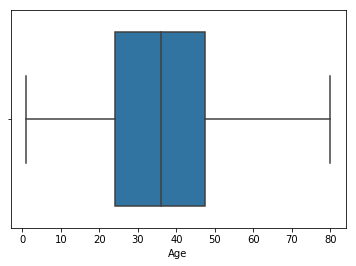

In [56]:
sns.boxplot(null_deleted_df['Age'])

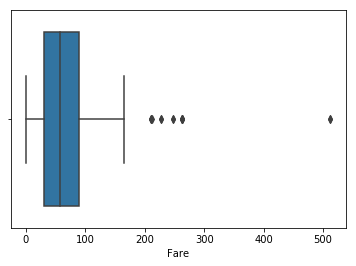

In [57]:
sns.boxplot(null_deleted_df['Fare'])

In [64]:
# Interquartile Range to Detect Outliers
def detect_outlier(series):
    """ Find the outlier in the series
    Args:
        series: pandas seris of which we need to find the outlier
    Return:
        Pandas Dataframe: dataframe with quartiles, IQR and outlier
    """
    outlier = []
    
    Q1 = np.percentile(series, 25, interpolation='midpoint') 
    md = np.percentile(series, 50, interpolation='midpoint') 
    Q3 = np.percentile(series, 75, interpolation='midpoint') 
    
    IQR = Q3 - Q1 
    up_limit = Q3 + 1.5*IQR
    low_limit = Q1 -1.5*IQR
    
    for value in series:
        if value > up_limit or value < low_limit:
            outlier.append(value)
    #return pd.DataFrame({'Q1':Q1,'Q2':md,'Q3':Q3,'IQR':IQR,'Outlier':outlier})
    return pd.DataFrame({'Columns':['Q1','Q2','Q3','Upper Limit','Lower Limit', 'IQR','Outlier'],'Number of Missing Values':[Q1, md, Q3, up_limit, low_limit, IQR, outlier]})

In [65]:
detect_outlier(null_deleted_df['Age'])

,Columns,Number of Missing Values
0,Q1,24.0
1,Q2,36.0
2,Q3,47.5
3,Upper Limit,82.75
4,Lower Limit,-11.25
5,IQR,23.5
6,Outlier,[]


In [70]:
detect_outlier(null_deleted_df['Fare'])

,Columns,Number of Missing Values
0,Q1,29.7
1,Q2,57.0
2,Q3,90.0
3,Upper Limit,180.45
4,Lower Limit,-60.75
5,IQR,60.3
6,Outlier,"[263.0, 263.0, 247.5208, 247.5208, 262.375, 26..."


In [71]:
detect_outlier(null_deleted_df['Fare']).iloc[6][1]

[263.0,
 263.0,
 247.5208,
 247.5208,
 262.375,
 263.0,
 211.5,
 263.0,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]